In [5]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

In [6]:
plt.rc('lines', linewidth=6)
plt.rc('font', size=48, family='serif', weight=500)
plt.rc('mathtext', fontset = 'dejavuserif')
plt.rc('axes', linewidth=6)
plt.rc('patch', linewidth=6)
plt.rc('xtick.major', width=5, size=20)
plt.rc('xtick.minor', width=4, size=15)
plt.rc('ytick.major', width=5, size=20)
plt.rc('ytick.minor', width=4, size=15)

In [13]:
infile_delta_2_to_10 = 'alysa-datafiles/initial_conditions_delta_2_to_10.npz'
infile_delta_10_to_13 = 'alysa-datafiles/initial_conditions_delta_10_to_13.npz'

outfile_nbody_delta_2_to_10 = 'alysa-datafiles/merged_output_files_delta_2_to_10.npz'
outfile_nbody_delta_10_to_13 = 'alysa-datafiles/merged_output_files_delta_10_to_13.npz'

outfile_ml_probs = 'alysa-datafiles/stability-probs-all.npz'

In [14]:
## load hill spacing

ic_delta_2_to_10 = np.load(infile_delta_2_to_10)
ic_delta_10_to_13 = np.load(infile_delta_10_to_13)

delta_2_to_10 = ic_delta_2_to_10['delta']
delta_10_to_13 = ic_delta_10_to_13['delta']

delta = np.hstack((delta_2_to_10, delta_10_to_13))

In [15]:
## load rebound simulation first close encounter times

nbody_delta_2_to_10 = np.load(outfile_nbody_delta_2_to_10)
nbody_delta_10_to_13 = np.load(outfile_nbody_delta_10_to_13)

t_exit_delta_2_to_10 = nbody_delta_2_to_10['t_exit']/(0.99)**(3./2)
t_exit_delta_10_to_13 = nbody_delta_10_to_13['t_exit']/(0.99)**(3./2)

t_exit = np.hstack((t_exit_delta_2_to_10, t_exit_delta_10_to_13))

log_t_exit = np.log10(t_exit)
survival_1e9 = log_t_exit >= 9

survival_true = survival_1e9 == True
survival_false = survival_1e9 == False

In [16]:
## load machine learning stability probabilities

ml_data = np.load(outfile_ml_probs)

probs = ml_data['probs']

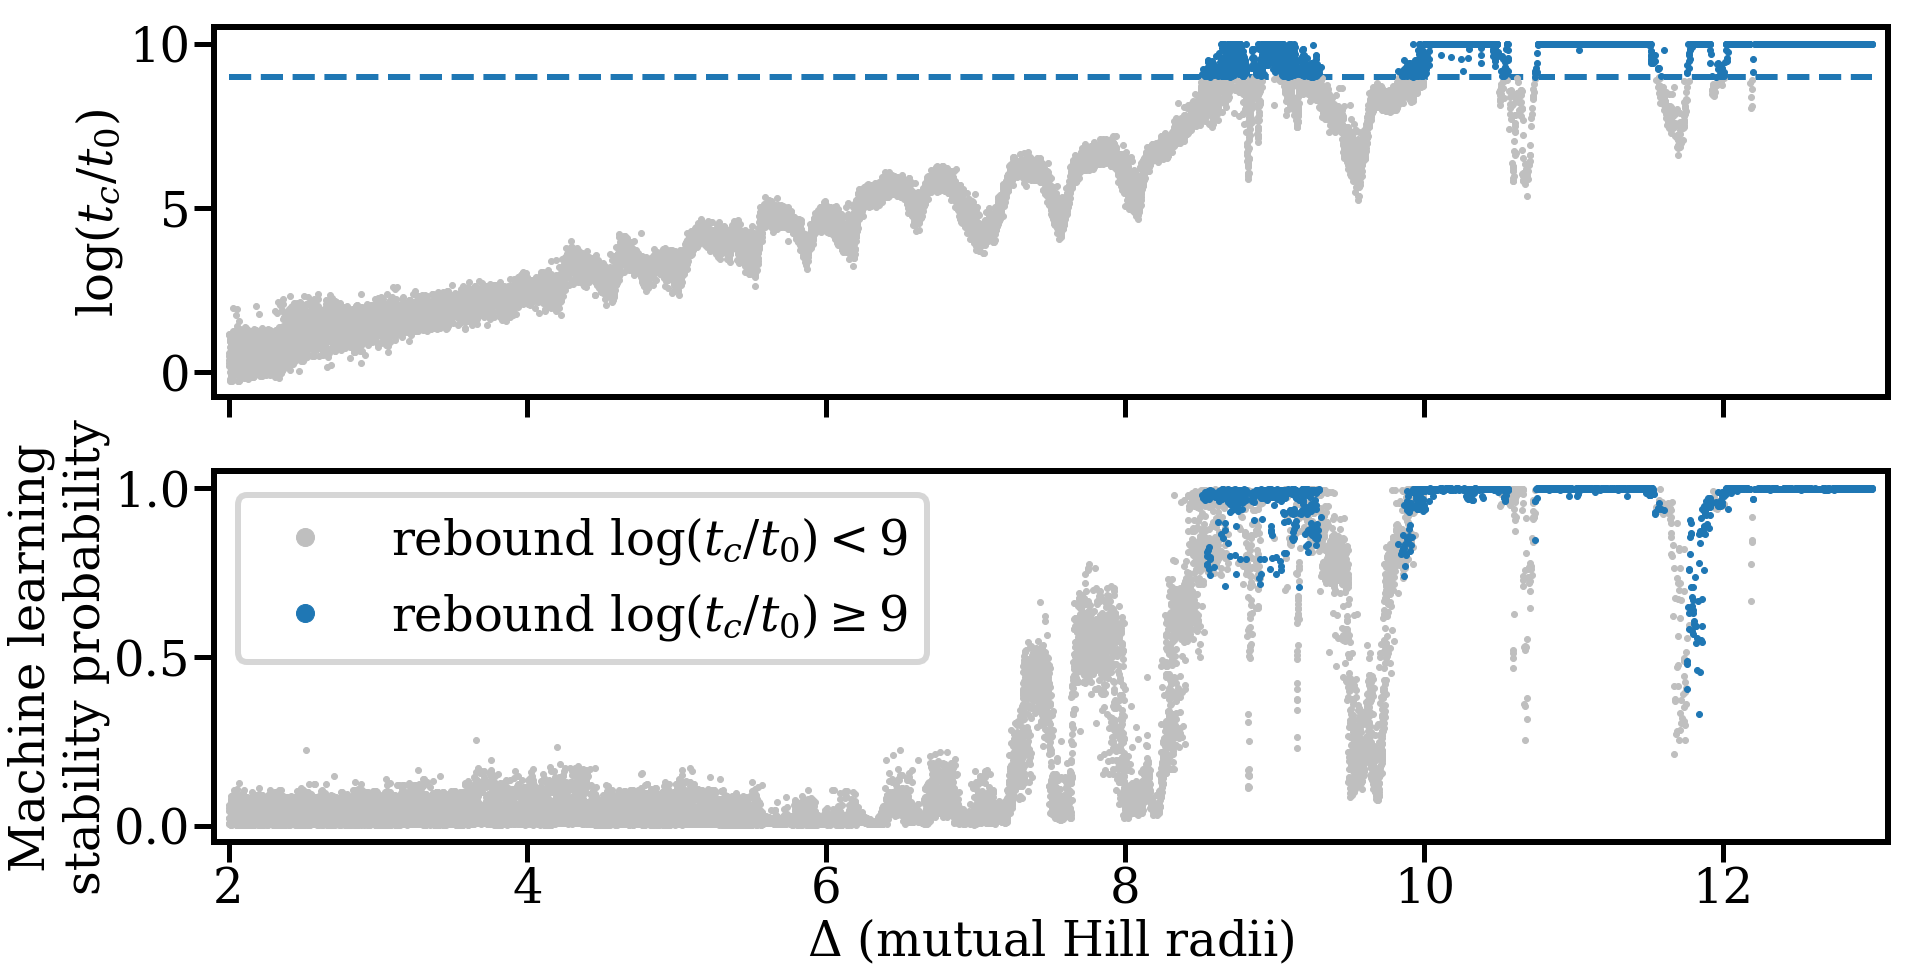

In [17]:
## plot delta vs prob

fig, ax = plt.subplots(2, 1, figsize=(30,15), sharex=True)

# scatter

ax[1].plot(delta[survival_false], probs[survival_false],'ok',color='0.75',rasterized=True,label='rebound log$(t_c/t_0) < 9$')
ax[1].plot(delta[survival_true], probs[survival_true],'oC0',rasterized=True,label='rebound log$(t_c/t_0) \geq 9$')

ax[0].plot([np.min(delta), np.max(delta)], [9,9], '--C0')
ax[0].plot(delta[survival_false],log_t_exit[survival_false],'ok',color='0.75',rasterized=True,label='log$(t_c/t_0) < 9$')
ax[0].plot(delta[survival_true],log_t_exit[survival_true],'oC0',rasterized=True,label='log$(t_c/t_0) \geq 9$')

ax[1].set_xlabel("$\Delta$ (mutual Hill radii)")
ax[1].set_xlim([1.9, 13.1])

ax[1].set_ylabel("Machine learning\nstability probability")
ax[0].set_ylabel("log$(t_c/t_0)$")

ax[1].legend(loc=2, markerscale=3)
# ax[1].legend(loc=2, markerscale=3)

# save

# plt.savefig('delta-vs-logt-and-prob.pdf',bbox_inches='tight')
plt.savefig('alysa.png',bbox_inches='tight')


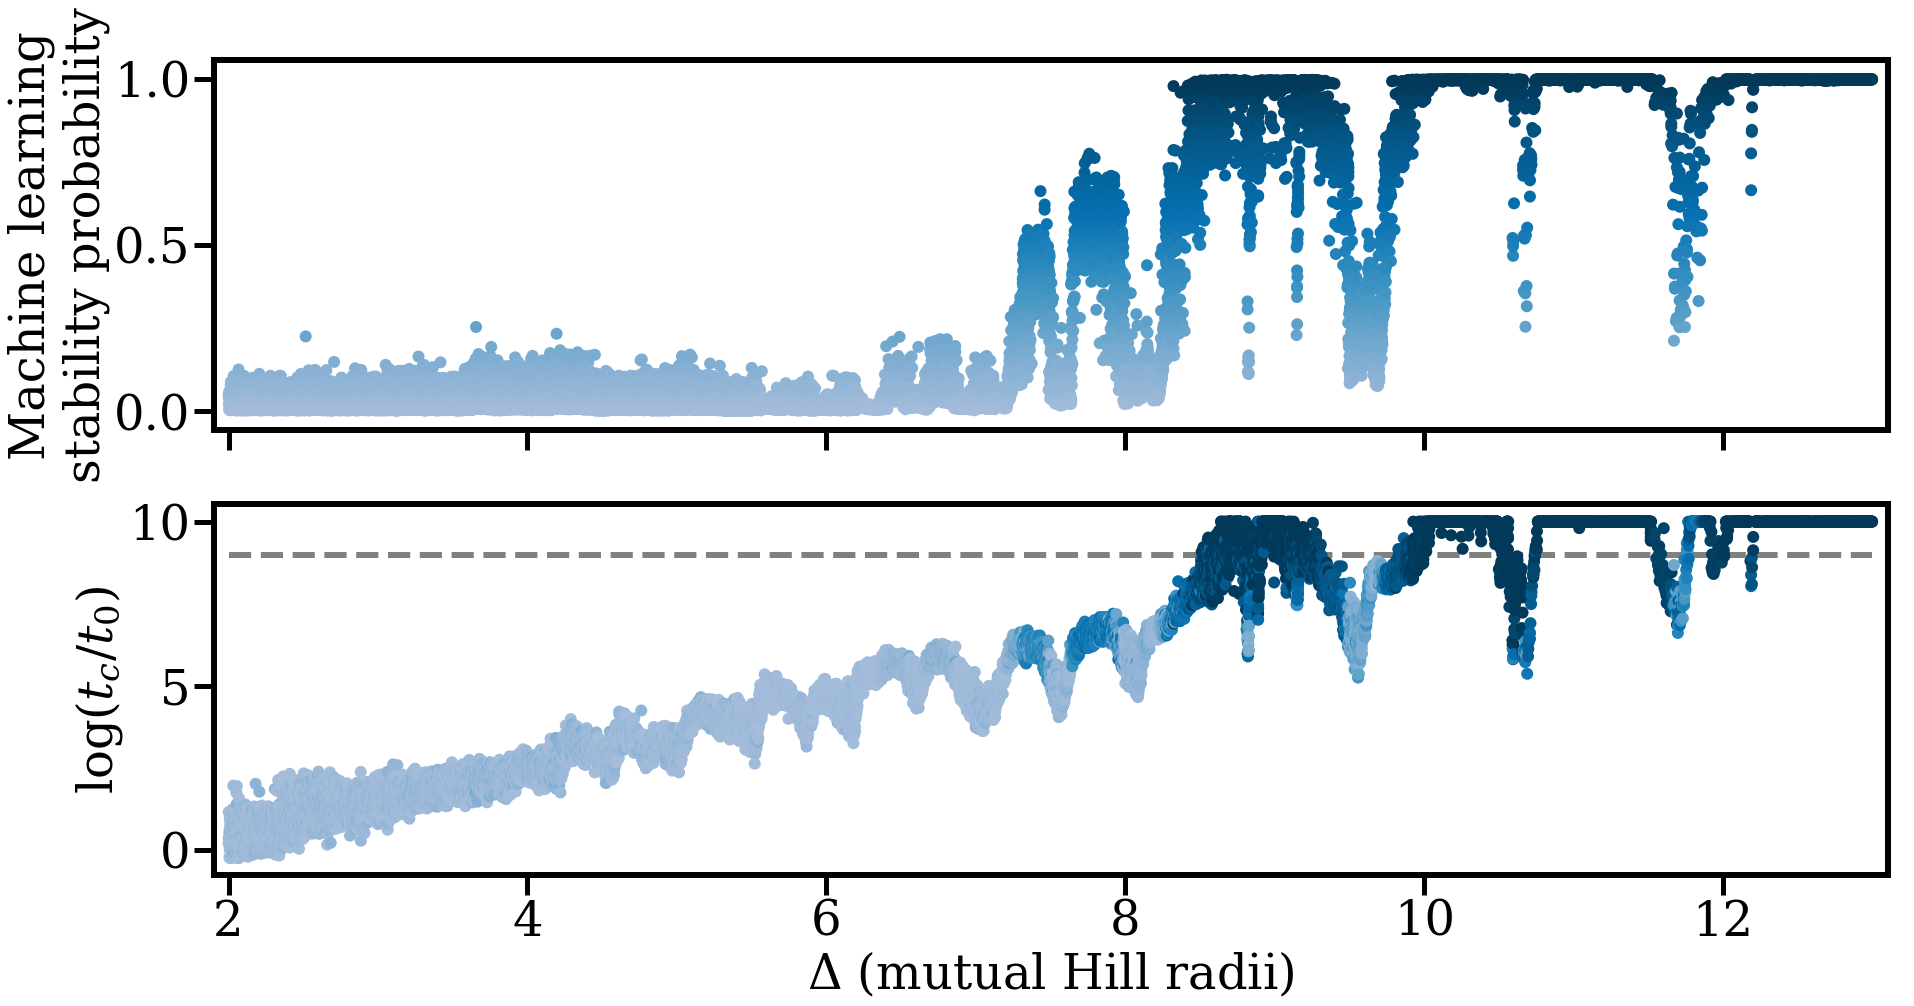

In [18]:
## plot delta vs prob with colourbar set by prob

fig, ax = plt.subplots(2, 1, figsize=(30,15), sharex=True)

# scatter

ax[0].scatter(delta, probs, c=probs, cmap='PuBu', vmin=-0.6, rasterized=True)
# ax[1].plot(delta[survival_true], probs[survival_true],'oC0',rasterized=True,label='rebound log$(t_c/t_0) \geq 9$')

ax[1].plot([np.min(delta), np.max(delta)], [9,9], '--', c='0.5', zorder=0)
ax[1].scatter(delta,log_t_exit, c=probs, cmap='PuBu', vmin=-0.6, zorder=1, rasterized=True)
# ax[0].plot(delta[survival_true],log_t_exit[survival_true],'oC0',rasterized=True,label='log$(t_c/t_0) \geq 9$')

ax[1].set_xlabel("$\Delta$ (mutual Hill radii)")
ax[1].set_xlim([1.9, 13.1])

ax[0].set_ylabel("Machine learning\nstability probability")
ax[1].set_ylabel("log$(t_c/t_0)$")

# ax[1].legend(loc=2, markerscale=3)
# ax[1].legend(loc=2, markerscale=3)

# save

# plt.savefig('delta-vs-logt-and-prob-ml-cmap.pdf',bbox_inches='tight')
plt.savefig('alysa-second-version.png',bbox_inches='tight')


In [19]:
## calculate true positive, true negative, false positive, false negative fractions

p_thresh = 0.5 # threshold probability for classification

N_stable = sum(log_t_exit >= 9)
N_unstable = sum(log_t_exit < 9)

N_TP = sum(np.logical_and(probs >= p_thresh, log_t_exit >= 9))
N_TN = sum(np.logical_and(probs < p_thresh, log_t_exit < 9))
N_FP = sum(np.logical_and(probs >= p_thresh, log_t_exit < 9))
N_FN = sum(np.logical_and(probs < p_thresh, log_t_exit >= 9))


In [20]:
print(N_stable, N_unstable)

2227 15273


In [21]:
print(N_TP,N_TN,N_FP,N_FN)

2221 12777 2496 6


In [22]:
print(N_TP + N_FN)

2227


In [23]:
print(N_TN + N_FP)

15273
